<h1>Criando arquivos stl para impressão 3D com Python</h1>

In [1]:
## instalar na primeira vez
# !pip install numpy-stl

In [2]:
##  bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import stl
from stl import mesh

In [14]:
##  parâmetros
u = (
    np.linspace(
        -1, 1, # mudar aqui
        endpoint=True,
        num=50
    ) * np.ones(
        (10, 1))
).flatten()

v = np.repeat(
    np.linspace(
        0, 2 * np.pi, # mudar aqui
        endpoint=True,
        num=10),
    repeats=50
).flatten()

In [15]:
##  paramétricas da superfície 
x = np.cosh(u) * np.cos(v) # mudar aqui
y = np.cosh(u) * np.sin(v) # mudar aqui
z = np.sinh(u) # mudar aqui

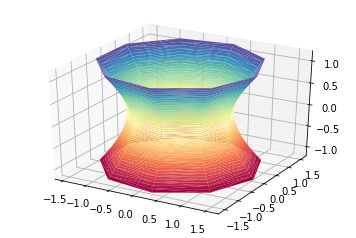

In [16]:
## visualizando a figura

# Triangulalizarndo os parâmetros
tri = mtri.Triangulation(u, v)

# janela da figura
figure = plt.figure()

# eixos tridimensionais
ax = figure.gca(projection='3d')

# superfície
surface_triangulizado = ax.plot_trisurf(
    x, y, z,
    triangles=tri.triangles,
    cmap=plt.cm.Spectral
)

# visualizando
plt.show()

In [17]:
# malha poligonal nula
dados = np.zeros(
    len(tri.triangles),
    dtype=mesh.Mesh.dtype
)

surface_mesh = mesh.Mesh(
    dados,
    remove_empty_areas=False
)

In [18]:
# passando valores para a malha poligonal
surface_mesh.x[:] = x[tri.triangles]
surface_mesh.y[:] = y[tri.triangles]
surface_mesh.z[:] = z[tri.triangles]

# salvando a malha em arquivo STL
surface_mesh.save('surface.stl')